# eXpand and eXploit Study Analysis
This notebook is used to analyze data from the eXpand and eXploit study conducted during May 2017 - June 2017

# Imports and Common Functions

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import datetime

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

sns.despine()
sns.set(font_scale=1.5)
sns.set_style("white")

# Loading in data from Parse

In [3]:
# URL and header for Parse
base_url = 'https://les-expand.herokuapp.com/parse/classes/'
header = {'X-Parse-Application-Id': 'PkngqKtJygU9WiQ1GXM9eC0a17tKmioKKmpWftYr'}
data = {'limit': '10000'}

## eXpand data

In [4]:
# expand outer notifications
resp = requests.get(base_url + 'expandNotifications', headers=header, data=data)
expand_notfications = pd.DataFrame(resp.json()['results'])

expand_notfications_string_cols = ['objectId', 'levelOfInformation', 'vendorId', \
                                   'tag', 'distanceCondition', 'hotspotId']
expand_notfications['createdAt'] = (pd.to_datetime(expand_notfications['createdAt']).astype(np.int64) // 10**9)
expand_notfications['updatedAt'] = (pd.to_datetime(expand_notfications['updatedAt']).astype(np.int64) // 10**9)
expand_notfications[expand_notfications_string_cols] = expand_notfications[expand_notfications_string_cols].astype(str)

# expand outer notifications response
resp = requests.get(base_url + 'expandResponses', headers=header, data=data)
expand_response = pd.DataFrame(resp.json()['results'])

expand_response_string_cols = ['objectId', 'levelOfInformation', 'emaResponse', \
                                   'vendorId', 'distanceCondition', 'hotspotId']
expand_response['createdAt'] = (pd.to_datetime(expand_response['createdAt']).astype(np.int64) // 10**9)
expand_response['updatedAt'] = (pd.to_datetime(expand_response['updatedAt']).astype(np.int64) // 10**9)
expand_response[expand_response_string_cols] = expand_response[expand_response_string_cols].astype(str)

## At-location notification responses

In [5]:
# hotspots
resp = requests.get(base_url + 'hotspot', headers=header, data=data)
hotspots = pd.DataFrame(resp.json()['results'])

hotspot_string_cols = ['objectId', 'vendorId', 'archiver', 'locationCommonName', \
                       'tag', 'submissionMethod', 'beaconId']
hotspots['createdAt'] = (pd.to_datetime(hotspots['createdAt']).astype(np.int64) // 10**9)
hotspots['updatedAt'] = (pd.to_datetime(hotspots['updatedAt']).astype(np.int64) // 10**9)
hotspots[hotspot_string_cols] = hotspots[hotspot_string_cols].astype(str)

# sent notifications
resp = requests.get(base_url + 'notificationSent', headers=header, data=data)
notification_sent = pd.DataFrame(resp.json()['results'])

notification_sent_string_cols = ['objectId', 'vendorId', 'hotspotId', 'notificationString']
notification_sent['createdAt'] = (pd.to_datetime(notification_sent['createdAt']).astype(np.int64) // 10**9)
notification_sent['updatedAt'] = (pd.to_datetime(notification_sent['updatedAt']).astype(np.int64) // 10**9)
notification_sent[notification_sent_string_cols] = notification_sent[notification_sent_string_cols].astype(str)

# notification responses
resp = requests.get(base_url + 'pingResponse', headers=header, data=data)
notification_responses = pd.DataFrame(resp.json()['results'])

notification_responses_string_cols = ['objectId', 'hotspotId', 'vendorId', 'question', 'response', 'tag']
notification_responses['createdAt'] = (pd.to_datetime(notification_responses['createdAt']).astype(np.int64) // 10**9)
notification_responses['updatedAt'] = (pd.to_datetime(notification_responses['updatedAt']).astype(np.int64) // 10**9)
notification_responses[notification_responses_string_cols] = \
    notification_responses[notification_responses_string_cols].astype(str)

# users
resp = requests.get(base_url + 'user', headers=header, data=data)
users = pd.DataFrame(resp.json()['results'])

user_string_cols = ['objectId', 'firstName', 'lastName', 'vendorId', \
                    'firstPreference', 'secondPreference', 'thirdPreference', 'fourthPreference']
users['createdAt'] = (pd.to_datetime(users['createdAt']).astype(np.int64) // 10**9)
users['updatedAt'] = (pd.to_datetime(users['updatedAt']).astype(np.int64) // 10**9)
users[user_string_cols] = users[user_string_cols].astype(str)

# pretracking debug (to see app terminations) 
resp = requests.get(base_url + 'pretracking_debug', headers=header, data=data)
debug = pd.DataFrame(resp.json()['results'])

debug_string_cols = ['objectId', 'vendor_id', 'console_string']
debug['createdAt'] = (pd.to_datetime(debug['createdAt']).astype(np.int64) // 10**9)
debug['updatedAt'] = (pd.to_datetime(debug['updatedAt']).astype(np.int64) // 10**9)
debug[debug_string_cols] = debug[debug_string_cols].astype(str)

## eXploit data

In [6]:
# eXploit locations
resp = requests.get(base_url + 'exploitLocations', headers=header, data=data)
exploit_locations = pd.DataFrame(resp.json()['results'])

exploit_locations_string_cols = ['objectId', 'vendorId', 'tag', 'question']
exploit_locations['createdAt'] = (pd.to_datetime(exploit_locations['createdAt']).astype(np.int64) // 10**9)
exploit_locations['updatedAt'] = (pd.to_datetime(exploit_locations['updatedAt']).astype(np.int64) // 10**9)
exploit_locations[exploit_locations_string_cols] = exploit_locations[exploit_locations_string_cols].astype(str)

# eXploit notifications
resp = requests.get(base_url + 'exploitNotification', headers=header, data=data)
exploit_notifications = pd.DataFrame(resp.json()['results'])

exploit_notifications_string_cols = ['objectId', 'vendorId', 'exploitId']
exploit_notifications['createdAt'] = (pd.to_datetime(exploit_notifications['createdAt']).astype(np.int64) // 10**9)
exploit_notifications['updatedAt'] = (pd.to_datetime(exploit_notifications['updatedAt']).astype(np.int64) // 10**9)
exploit_notifications[exploit_notifications_string_cols] = exploit_notifications[exploit_notifications_string_cols].astype(str)

# eXploit responses
resp = requests.get(base_url + 'exploitResponses', headers=header, data=data)
exploit_responses = pd.DataFrame(resp.json()['results'])

exploit_responses_string_cols = ['objectId', 'vendorId', 'exploitId', 'questionResponse']
exploit_responses['createdAt'] = (pd.to_datetime(exploit_responses['createdAt']).astype(np.int64) // 10**9)
exploit_responses['updatedAt'] = (pd.to_datetime(exploit_responses['updatedAt']).astype(np.int64) // 10**9)
exploit_responses[exploit_responses_string_cols] = exploit_responses[exploit_responses_string_cols].astype(str)

# Clean Data

In [7]:
# exclude researcher and dropped out subject
researcher_vendor_id = 'F1AE595D-F244-4367-8744-27CA60450F0D'
vendor_id_exclude_list = [researcher_vendor_id, '53C6A88A-8427-40D1-A4C5-103A47C655C2']

# filter data for timestamps between CST start and end time
start_time = 1495947600 # 05-28-2017 00:00:00
end_time   = 1496984400 # 06-09-2017 00:00:00

start_date = datetime.datetime.fromtimestamp(start_time)
end_date = datetime.datetime.fromtimestamp(end_time)

print('Study Length: {} days'.format((end_date - start_date).days))

Study Length: 12 days


## Subset dates and remove invalid IDs

In [8]:
expand_notfications = expand_notfications[(expand_notfications['createdAt'] >= start_time) & (expand_notfications['createdAt'] < end_time) & \
                                          (~expand_notfications['vendorId'].isin(vendor_id_exclude_list))].reset_index(drop=True)
expand_response = expand_response[(expand_response['createdAt'] >= start_time) & (expand_response['createdAt'] < end_time) & \
                                  (~expand_response['vendorId'].isin(vendor_id_exclude_list))].reset_index(drop=True)

In [9]:
hotspots = hotspots[(hotspots['createdAt'] >= start_time) & (hotspots['createdAt'] < end_time) & \
                    (~hotspots['vendorId'].isin(vendor_id_exclude_list))].reset_index(drop=True)

notification_sent = notification_sent[(notification_sent['createdAt'] >= start_time) & (notification_sent['createdAt'] < end_time) & \
                                      (~notification_sent['vendorId'].isin(vendor_id_exclude_list))].reset_index(drop=True)

notification_responses = notification_responses[(notification_responses['createdAt'] >= start_time) & (notification_responses['createdAt'] < end_time) & \
                                                (~notification_responses['vendorId'].isin(vendor_id_exclude_list))].reset_index(drop=True)

users = users[(users['createdAt'] >= start_time) & (users['createdAt'] < end_time) & \
              (~users['vendorId'].isin(vendor_id_exclude_list))].reset_index(drop=True)

debug = debug[(debug['createdAt'] >= start_time) & (debug['createdAt'] < end_time) & \
              (~debug['vendor_id'].isin(vendor_id_exclude_list))].reset_index(drop=True)

In [10]:
exploit_notifications = exploit_notifications[(exploit_notifications['createdAt'] >= start_time) & (exploit_notifications['createdAt'] < end_time) & \
                                              (~exploit_notifications['vendorId'].isin(vendor_id_exclude_list))].reset_index(drop=True)
exploit_responses = exploit_responses[(exploit_responses['createdAt'] >= start_time) & (exploit_responses['createdAt'] < end_time) & \
                                      (~exploit_responses['vendorId'].isin(vendor_id_exclude_list))].reset_index(drop=True)

## Remove responses where response is default Apple response

In [11]:
apple_responses = ['com.apple.UNNotificationDefaultActionIdentifier', 'com.apple.UNNotificationDismissActionIdentifier']

expand_response = expand_response[~expand_response['emaResponse'].isin(apple_responses)]
notification_responses = notification_responses[~notification_responses['response'].isin(apple_responses)]
exploit_responses = exploit_responses[~exploit_responses['questionResponse'].isin(apple_responses)]

# Analysis 
We segment the analysis into three sections.
1. eXpand acceptance rate: here we analyze how many users said they would go to a location and why.
2. At-location contribution rate: we conduct a eXplore like analysis of how people contribute when they go to the location.
3. eXploit contribution rate: a simple analysis of how people contribute to eXploit notifications.

# eXpand acceptance rate

In [12]:
# merge expand_send and expand_response
merged_expand = expand_notfications.merge(expand_response[['hotspotId', 'vendorId', 'timestamp', 'emaResponse']], \
                                          on=['hotspotId', 'vendorId'], how='left')

# add in location data from hotspot df
merged_expand = merged_expand.merge(hotspots[['objectId', 'locationCommonName']], \
                                    left_on='hotspotId', right_on='objectId', how='left')

# delete extra columns and rename
del merged_expand['objectId_y']
merged_expand.rename(columns={'timestamp_x': 'timestamp_sent', 'timestamp_y': 'timestamp_response', 'objectId_x': 'objectId'}, inplace=True)

# replace NAs
merged_expand['timestamp_response'].fillna(-1, inplace=True)
merged_expand['tag'].fillna('', inplace=True)
merged_expand['emaResponse'].fillna('missed notification', inplace=True)

# replace UNNotificationDefaultActionIdentifier and UNNotificationDismissActionIdentifier with missed notifications
merged_expand['emaResponse'].replace(['com.apple.UNNotificationDefaultActionIdentifier', 'com.apple.UNNotificationDismissActionIdentifier'], 'missed notification', inplace=True)

# type cast timestamp_response
merged_expand['timestamp_response'] = merged_expand['timestamp_response'].astype(np.int64)

# keep only last if there are duplicate rows
merged_expand['vendor_hotspot_id'] = merged_expand['vendorId'] + '_' + merged_expand['hotspotId']
merged_expand = merged_expand[~(merged_expand.duplicated(subset='vendor_hotspot_id', keep='last'))].reset_index(drop=True)
del merged_expand['vendor_hotspot_id']

# remove rows with NAs
merged_expand.dropna(inplace=True)

# show data frame
merged_expand.head(5)

,bearingToLocation,createdAt,distanceCondition,distanceToRegion,gmtOffset,hotspotId,levelOfInformation,objectId,tag,timestamp_sent,updatedAt,vendorId,timestamp_response,emaResponse,locationCommonName
0,31.930153,1496337757,200,199.749421,-18000,K6l3pl851i,1,DikRa4Ry0l,food,1496337757,1496337757,6FCA799C-3F56-425F-96B2-47CF72B84BC5,1496337841,"No, I have somewhere that I need to be.",McCormick Career Development Office (Ford 2nd ...
1,215.656448,1496337852,400,39.886554,-18000,K6l3pl851i,2,iVxWf4AVqg,food,1496337851,1496337852,FDFE420C-04ED-47D6-AADF-8909DD559659,1496337928,"Yes! Great to know, I'm going to go now!",McCormick Career Development Office (Ford 2nd ...
2,17.015173,1496338500,200,255.780418,-18000,rR31iA8wvh,2,6rTelktdQi,coffeeshops,1496338500,1496338500,EB127CEF-FF56-47EE-99D2-F6F72D7725E1,1496338549,"No, I'm not interested.",Norbucks
3,142.586681,1496338616,300,38.441369,-18000,K6l3pl851i,2,tIaz0yUHtz,food,1496338616,1496338616,082918FC-40D0-4E15-916F-B0DC4DCE8A7A,1496338862,"Yes! Great to know, I'm going to go now!",McCormick Career Development Office (Ford 2nd ...
4,157.114694,1496339052,400,42.150502,-18000,rR31iA8wvh,2,tVrVLdjB5p,coffeeshops,1496339052,1496339052,8CB7207D-EFDB-495B-B460-FE0E268D695A,1496339088,"No, I'm not interested.",Norbucks


In [13]:
print('Number of eXpand notifications: {}'.format(len(merged_expand)))

Number of eXpand notifications: 298


## Compute acceptance rate by level of information vs distance

Here, we take responses where the **EMA response was either 'Yes, but I was already going there.', 'Yes! Great to know, I\'m going to go now!' as critera for users accepting the notification**. 

### Missed notification by user histogram

In [16]:
missed_notifications = merged_expand[merged_expand['emaResponse'] == 'missed notification']
missed_by_user_count = missed_notifications.groupby('vendorId')['emaResponse'].count().reset_index(name='count')
missed_by_user_count = missed_by_user_count.sort_values('count', ascending=False).reset_index(drop=True)
missed_by_user_count

,vendorId,count
0,D19F4706-30D0-4A02-8370-B7C18FA83C28,20
1,11B8092A-E445-4B65-AE36-38AD9CAA443A,15
2,61DEF3DC-F749-48D9-8B6E-C4F2992A9677,10
3,7595F08E-D7AB-425F-9014-B9036CF0D4BE,7
4,843BF7BA-B9C2-484B-88AF-D59DD25A3ED5,6
5,C6378548-C814-463E-B508-1832F9354819,5
6,7BFFD836-DA8F-495B-88CA-4AF0E5F37B6B,5
7,75200C4F-8F36-42BB-8412-CC61CAC749C1,4
8,C8EC3293-A8AA-426D-BF49-876CCB9D3224,3
9,ADDD9CDC-AFFE-4958-8AB4-70E8D28E45E1,3


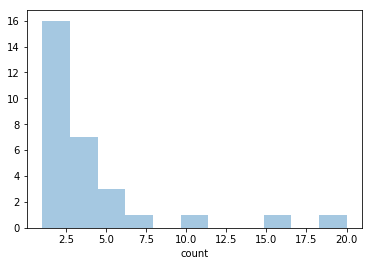

In [17]:
sns.distplot(missed_by_user_count['count'], kde=False)

In [18]:
all_notification_count = merged_expand.groupby('vendorId')['vendorId'].count().reset_index(name='count')
missed_notification_proportion = missed_by_user_count.merge(all_notification_count, on='vendorId', how='left', suffixes=['', '_total'])
missed_notification_proportion['proportion'] = 100 * missed_notification_proportion['count'] / missed_notification_proportion['count_total']
missed_notification_proportion = missed_notification_proportion.sort_values('proportion', ascending=False).reset_index(drop=True)
missed_notification_proportion

,vendorId,count,count_total,proportion
0,D19F4706-30D0-4A02-8370-B7C18FA83C28,20,20,100.000000
1,75200C4F-8F36-42BB-8412-CC61CAC749C1,4,4,100.000000
2,D62D54F8-B69C-408C-8302-66DAF452E0E4,1,1,100.000000
3,11B8092A-E445-4B65-AE36-38AD9CAA443A,15,15,100.000000
4,384671A9-42AE-4205-BE22-90AEEF2B2CCA,3,3,100.000000
5,5C7CE1E9-0F10-4AA0-93C0-A345D357A92F,1,1,100.000000
6,C6378548-C814-463E-B508-1832F9354819,5,5,100.000000
7,61DEF3DC-F749-48D9-8B6E-C4F2992A9677,10,10,100.000000
8,7595F08E-D7AB-425F-9014-B9036CF0D4BE,7,10,70.000000
9,2B129AC5-804B-4AC3-BC65-4A01A872C061,2,3,66.666667


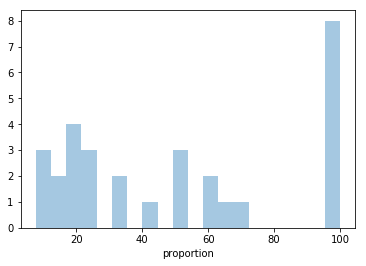

In [19]:
sns.distplot(missed_notification_proportion['proportion'], bins=20, kde=False)

## Remove Bad Users

In [20]:
bad_users = ['D19F4706-30D0-4A02-8370-B7C18FA83C28',
             '75200C4F-8F36-42BB-8412-CC61CAC749C1',
             '5C7CE1E9-0F10-4AA0-93C0-A345D357A92F',
             'C6378548-C814-463E-B508-1832F9354819',
             '11B8092A-E445-4B65-AE36-38AD9CAA443A']

In [85]:
cleaned_merged_expand = merged_expand[~merged_expand['vendorId'].isin(bad_users)]
simplified_merged_expand = cleaned_merged_expand[['distanceCondition', 'levelOfInformation', 'tag', 'emaResponse']]

# UNCOMMENT TO IGNORE MISSED NOTIFICATIONS
# simplified_merged_expand = simplified_merged_expand[simplified_merged_expand['emaResponse'] != 'missed notification']

simplified_merged_expand['wantToGo'] = 'no'
simplified_merged_expand.loc[simplified_merged_expand['emaResponse'].isin(['Yes, but I was already going there.', 'Yes! Great to know, I\'m going to go now!']), 'wantToGo'] = 'yes'

/Users/kapilgarg/miniconda3/envs/les/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/kapilgarg/miniconda3/envs/les/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/kapilgarg/miniconda3/envs/les/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

### EMA Responses Pre and Post Cleaning

In [88]:
# Pre Cleaning
merged_expand.groupby(['emaResponse'])['emaResponse'].count().reset_index(name='count')

,emaResponse,count
0,"No, I have somewhere that I need to be.",80
1,"No, I'm not interested.",60
2,"No, other reason.",4
3,"Yes! Great to know, I'm going to go now!",27
4,"Yes, but I was already going there.",14
5,missed notification,113


In [89]:
# Post Cleaning
cleaned_merged_expand.groupby(['emaResponse'])['emaResponse'].count().reset_index(name='count')

,emaResponse,count
0,"No, I have somewhere that I need to be.",80
1,"No, I'm not interested.",60
2,"No, other reason.",4
3,"Yes! Great to know, I'm going to go now!",27
4,"Yes, but I was already going there.",14
5,missed notification,68


In [90]:
# Pre Cleaning
ema_response_count = merged_expand.groupby(['emaResponse', 'tag'])['emaResponse'].count().reset_index(name='count')
ema_response_count.pivot(index='emaResponse', columns='tag')

count     
tag                                      coffeeshops food
emaResponse                                              
No, I have somewhere that I need to be.           47   33
No, I'm not interested.                           52    8
No, other reason.                                  3    1
Yes! Great to know, I'm going to go now!           9   18
Yes, but I was already going there.                6    8
missed notification                               66   47

In [91]:
# Pre Cleaning
ema_response_count_cleaned = cleaned_merged_expand.groupby(['emaResponse', 'tag'])['emaResponse'].count().reset_index(name='count')
ema_response_count_cleaned.pivot(index='emaResponse', columns='tag')

count     
tag                                      coffeeshops food
emaResponse                                              
No, I have somewhere that I need to be.           47   33
No, I'm not interested.                           52    8
No, other reason.                                  3    1
Yes! Great to know, I'm going to go now!           9   18
Yes, but I was already going there.                6    8
missed notification                               36   32

In [22]:
# overall 'yes' proportion
print('Overall Acceptance Rate: {}%'.format(round(100 * len(simplified_merged_expand[simplified_merged_expand['wantToGo'] == 'yes']) / len(simplified_merged_expand), 2)))

Overall Acceptance Rate: 16.21%


### Acceptance Rate by Category

In [23]:
acceptance_by_cat = simplified_merged_expand.groupby(['tag', 'wantToGo'])['wantToGo'].count().reset_index(name='count')
acceptance_by_cat['proportion'] = 0
acceptance_by_cat.loc[acceptance_by_cat['tag'] == 'coffeeshops', 'proportion'] = 100 * acceptance_by_cat[acceptance_by_cat['tag'] == 'coffeeshops']['count'] / sum(acceptance_by_cat[acceptance_by_cat['tag'] == 'coffeeshops']['count'])
acceptance_by_cat.loc[acceptance_by_cat['tag'] == 'food', 'proportion'] = 100 * acceptance_by_cat[acceptance_by_cat['tag'] == 'food']['count'] / sum(acceptance_by_cat[acceptance_by_cat['tag'] == 'food']['count'])
acceptance_by_cat

,tag,wantToGo,count,proportion
0,coffeeshops,no,138,90.196078
1,coffeeshops,yes,15,9.803922
2,food,no,74,74.000000
3,food,yes,26,26.000000


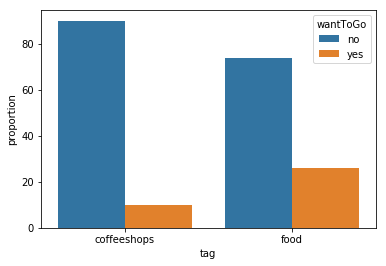

In [24]:
sns.barplot(data=acceptance_by_cat[['tag', 'proportion', 'wantToGo']], x='tag', y='proportion', hue='wantToGo')

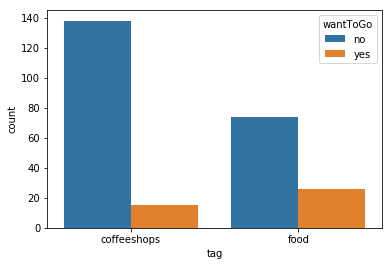

In [25]:
sns.barplot(data=acceptance_by_cat[['tag', 'count', 'wantToGo']], x='tag', y='count', hue='wantToGo')

### Acceptance Rate by Category and Distance

In [157]:
acceptance_by_cat_distance = simplified_merged_expand.groupby(['tag', 'distanceCondition', 'wantToGo'])['wantToGo'].count().reset_index(name='count')
acceptance_by_cat_distance_grouping = acceptance_by_cat_distance.groupby(['tag', 'distanceCondition', 'wantToGo']).agg({'count': 'sum'})
acceptance_by_cat_distance_prop = acceptance_by_cat_distance_grouping.groupby(['tag', 'distanceCondition']).apply(lambda x: 100 * x / float(x.sum())).reset_index()
acceptance_by_cat_distance_prop

,tag,distanceCondition,wantToGo,count
0,coffeeshops,200,no,84.444444
1,coffeeshops,200,yes,15.555556
2,coffeeshops,300,no,92.307692
3,coffeeshops,300,yes,7.692308
4,coffeeshops,400,no,92.857143
5,coffeeshops,400,yes,7.142857
6,food,200,no,74.285714
7,food,200,yes,25.714286
8,food,300,no,62.962963
9,food,300,yes,37.037037


In [121]:
acceptance_cat_dist_bar_data = acceptance_by_cat_distance_prop[acceptance_by_cat_distance_prop['wantToGo'] == 'yes']
acceptance_cat_dist_bar_data.replace({'tag': {'coffeeshops': 'Coffee Shops', 'food': 'Free Food'}}, inplace=True)
acceptance_cat_dist_bar_data['count'] = round(acceptance_cat_dist_bar_data['count'], 2)

/Users/kapilgarg/miniconda3/envs/les/lib/python3.6/site-packages/pandas/core/generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
/Users/kapilgarg/miniconda3/envs/les/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


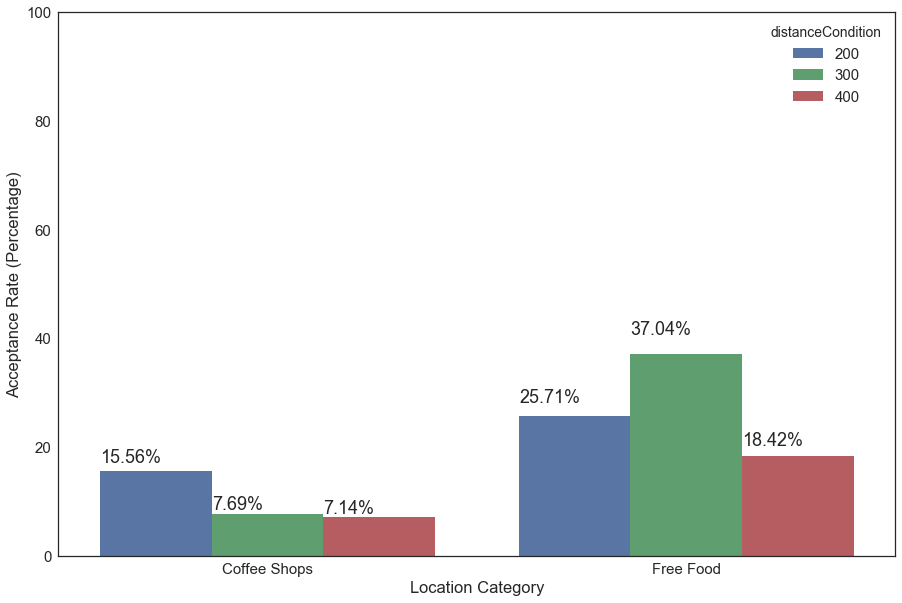

In [146]:
fig, ax = plt.subplots(figsize=(15, 10));
acceptance_cat_dist_bar = sns.barplot(data=acceptance_cat_dist_bar_data, x='tag', y='count', hue='distanceCondition')
acceptance_cat_dist_bar.set(xlabel='Location Category', ylabel='Acceptance Rate (Percentage)')
acceptance_cat_dist_bar.set_ylim(0, 100)
for p in acceptance_cat_dist_bar.patches:
    acceptance_cat_dist_bar.annotate('{}%'.format(p.get_height()), (p.get_x() * 1.001, p.get_height() * 1.1))

### Level of Information vs Distance Matrix for All Categories

In [67]:
# compute initial matrix
information_vs_distance_acceptance = simplified_merged_expand.groupby(['distanceCondition', 'levelOfInformation', 'wantToGo'])['wantToGo'].count().reset_index(name='count')
information_vs_distance_acceptance['id'] = information_vs_distance_acceptance['distanceCondition'] + '_' + information_vs_distance_acceptance['levelOfInformation']

# get totals for each square in matrix
total_count_info_dist = information_vs_distance_acceptance.groupby('id')['count'].sum().reset_index(name='count')
information_vs_distance_acceptance = information_vs_distance_acceptance.merge(total_count_info_dist, on='id', suffixes=['', '_total'])
information_vs_distance_acceptance['proportion'] = information_vs_distance_acceptance['count'] / information_vs_distance_acceptance['count_total']

#### Yes and Total Count for All Categories

In [71]:
# format table
acceptance_mat_yes_count = information_vs_distance_acceptance[information_vs_distance_acceptance['wantToGo'] == 'yes'][['distanceCondition', 'levelOfInformation', 'count']]
acceptance_mat_yes_count = acceptance_mat_yes_count.pivot(index='levelOfInformation', columns='distanceCondition').fillna(0)

# add count
yes_total_count = acceptance_mat_yes_count.sum(axis=0)
yes_total_count.name = 'Total Count'
acceptance_mat_yes_count = acceptance_mat_yes_count.append(yes_total_count)

acceptance_mat_yes_count

count            
distanceCondition    200   300   400
levelOfInformation                  
0                    2.0   1.0   1.0
1                    6.0   4.0   7.0
2                    6.0   4.0   3.0
3                    2.0   5.0   0.0
Total Count         16.0  14.0  11.0

In [72]:
acceptance_mat_total_count = information_vs_distance_acceptance[information_vs_distance_acceptance['wantToGo'] == 'yes'][['distanceCondition', 'levelOfInformation', 'count_total']]
acceptance_mat_total_count = acceptance_mat_total_count.pivot(index='levelOfInformation', columns='distanceCondition').fillna(0)

# add count
total_total_count = acceptance_mat_total_count.sum(axis=0)
total_total_count.name = 'Total Count'
acceptance_mat_total_count = acceptance_mat_total_count.append(total_total_count)
acceptance_mat_total_count.columns.set_levels([['count'], ['200', '300', '400']], inplace=True)

acceptance_mat_total_count

count            
distanceCondition    200   300   400
levelOfInformation                  
0                   11.0   6.0   5.0
1                   34.0  40.0  52.0
2                   24.0  23.0  27.0
3                   11.0  10.0   0.0
Total Count         80.0  79.0  84.0

#### Proportions for All Categories

In [73]:
# format table
acceptance_mat_yes_prop = round((100 * acceptance_mat_yes_count / acceptance_mat_total_count).fillna(0), 2)
acceptance_mat_yes_prop.index = ['0', '1', '2', '3', 'Overall Acceptance Rate']
acceptance_mat_yes_prop

count              
distanceCondition          200    300    400
0                        18.18  16.67  20.00
1                        17.65  10.00  13.46
2                        25.00  17.39  11.11
3                        18.18  50.00   0.00
Overall Acceptance Rate  20.00  17.72  13.10

### Level of Information vs Distance Matrix for Food Only

In [74]:
# compute initial matrix
information_vs_distance_acceptance = simplified_merged_expand[simplified_merged_expand['tag'] == 'food'].groupby(['distanceCondition', 'levelOfInformation', 'wantToGo'])['wantToGo'].count().reset_index(name='count')
information_vs_distance_acceptance['id'] = information_vs_distance_acceptance['distanceCondition'] + '_' + information_vs_distance_acceptance['levelOfInformation']

# get totals for each square in matrix
total_count_info_dist = information_vs_distance_acceptance.groupby('id')['count'].sum().reset_index(name='count')
information_vs_distance_acceptance = information_vs_distance_acceptance.merge(total_count_info_dist, on='id', suffixes=['', '_total'])
information_vs_distance_acceptance['proportion'] = information_vs_distance_acceptance['count'] / information_vs_distance_acceptance['count_total']

#### Yes and Total Count for Food Only

In [75]:
# format table
acceptance_mat_yes_count = information_vs_distance_acceptance[information_vs_distance_acceptance['wantToGo'] == 'yes'][['distanceCondition', 'levelOfInformation', 'count']]
acceptance_mat_yes_count = acceptance_mat_yes_count.pivot(index='levelOfInformation', columns='distanceCondition').fillna(0)

# add count
yes_total_count = acceptance_mat_yes_count.sum(axis=0)
yes_total_count.name = 'Total Count'
acceptance_mat_yes_count = acceptance_mat_yes_count.append(yes_total_count)

acceptance_mat_yes_count

count           
distanceCondition    200   300  400
levelOfInformation                 
0                    2.0   1.0  1.0
1                    2.0   1.0  4.0
2                    3.0   3.0  2.0
3                    2.0   5.0  0.0
Total Count          9.0  10.0  7.0

In [76]:
acceptance_mat_total_count = information_vs_distance_acceptance[information_vs_distance_acceptance['wantToGo'] == 'yes'][['distanceCondition', 'levelOfInformation', 'count_total']]
acceptance_mat_total_count = acceptance_mat_total_count.pivot(index='levelOfInformation', columns='distanceCondition').fillna(0)

# add count
total_total_count = acceptance_mat_total_count.sum(axis=0)
total_total_count.name = 'Total Count'
acceptance_mat_total_count = acceptance_mat_total_count.append(total_total_count)
acceptance_mat_total_count.columns.set_levels([['count'], ['200', '300', '400']], inplace=True)

acceptance_mat_total_count

count            
distanceCondition    200   300   400
levelOfInformation                  
0                   11.0   6.0   5.0
1                    8.0   6.0  18.0
2                    5.0   5.0   5.0
3                   11.0  10.0   0.0
Total Count         35.0  27.0  28.0

#### Proportions for Food Only

In [77]:
# format table
acceptance_mat_yes_prop = round((100 * acceptance_mat_yes_count / acceptance_mat_total_count).fillna(0), 2)
acceptance_mat_yes_prop.index = ['0', '1', '2', '3', 'Overall Acceptance Rate']
acceptance_mat_yes_prop

count              
distanceCondition          200    300    400
0                        18.18  16.67  20.00
1                        25.00  16.67  22.22
2                        60.00  60.00  40.00
3                        18.18  50.00   0.00
Overall Acceptance Rate  25.71  37.04  25.00

### Level of Information vs Distance Matrix for Coffee Shops Only

In [78]:
# compute initial matrix
information_vs_distance_acceptance = simplified_merged_expand[simplified_merged_expand['tag'] == 'coffeeshops'].groupby(['distanceCondition', 'levelOfInformation', 'wantToGo'])['wantToGo'].count().reset_index(name='count')
information_vs_distance_acceptance['id'] = information_vs_distance_acceptance['distanceCondition'] + '_' + information_vs_distance_acceptance['levelOfInformation']

# get totals for each square in matrix
total_count_info_dist = information_vs_distance_acceptance.groupby('id')['count'].sum().reset_index(name='count')
information_vs_distance_acceptance = information_vs_distance_acceptance.merge(total_count_info_dist, on='id', suffixes=['', '_total'])
information_vs_distance_acceptance['proportion'] = information_vs_distance_acceptance['count'] / information_vs_distance_acceptance['count_total']

#### Yes and Total Counts for Coffee Shops Only

In [79]:
# format table
acceptance_mat_yes_count = information_vs_distance_acceptance[information_vs_distance_acceptance['wantToGo'] == 'yes'][['distanceCondition', 'levelOfInformation', 'count']]
acceptance_mat_yes_count = acceptance_mat_yes_count.pivot(index='levelOfInformation', columns='distanceCondition').fillna(0)

# add count
yes_total_count = acceptance_mat_yes_count.sum(axis=0)
yes_total_count.name = 'Total Count'
acceptance_mat_yes_count = acceptance_mat_yes_count.append(yes_total_count)

acceptance_mat_yes_count

count        
distanceCondition    200 300 400
levelOfInformation              
1                      4   3   3
2                      3   1   1
Total Count            7   4   4

In [80]:
acceptance_mat_total_count = information_vs_distance_acceptance[information_vs_distance_acceptance['wantToGo'] == 'yes'][['distanceCondition', 'levelOfInformation', 'count_total']]
acceptance_mat_total_count = acceptance_mat_total_count.pivot(index='levelOfInformation', columns='distanceCondition').fillna(0)

# add count
total_total_count = acceptance_mat_total_count.sum(axis=0)
total_total_count.name = 'Total Count'
acceptance_mat_total_count = acceptance_mat_total_count.append(total_total_count)
acceptance_mat_total_count.columns.set_levels([['count'], ['200', '300', '400']], inplace=True)

acceptance_mat_total_count

count        
distanceCondition    200 300 400
levelOfInformation              
1                     26  34  34
2                     19  18  22
Total Count           45  52  56

#### Proportions for Coffee Shops Only

In [81]:
# format table
acceptance_mat_yes_prop = round((100 * acceptance_mat_yes_count / acceptance_mat_total_count).fillna(0), 2)
acceptance_mat_yes_prop.index = ['1', '2', 'Overall Acceptance Rate']
acceptance_mat_yes_prop

count            
distanceCondition          200   300   400
1                        15.38  8.82  8.82
2                        15.79  5.56  4.55
Overall Acceptance Rate  15.56  7.69  7.14

# At-location contribution rate

In [147]:
# merge notification sent and notification responses
merged_notifications = notification_sent.merge(notification_responses[['hotspotId', 'vendorId', 'timestamp', 'question', 'response']], \
                                               on=['hotspotId','vendorId'], how='left')

# add in location data from hotspot df
merged_notifications = merged_notifications.merge(hotspots[['objectId', 'tag', 'locationCommonName']], \
                                                  left_on='hotspotId', right_on='objectId', how='left')

# delete extra columns and rename
del merged_notifications['objectId_y']
merged_notifications.rename(columns={'timestamp_x': 'timestamp_sent', 'timestamp_y': 'timestamp_response', 'objectId_x': 'objectId'}, \
                            inplace=True)

# replace NAs
merged_notifications['timestamp_response'].fillna(-1, inplace=True)
merged_notifications['tag'].fillna('', inplace=True)
merged_notifications['question'].fillna('', inplace=True)
merged_notifications['response'].fillna('missed notification', inplace=True)

# type cast timestamp_response
merged_notifications['timestamp_response'] = merged_notifications['timestamp_response'].astype(np.int64)

# keep only last if there are duplicate rows
merged_notifications['vendor_hotspot_id'] = merged_notifications['vendorId'] + '_' + merged_notifications['hotspotId']
merged_notifications = merged_notifications[~(merged_notifications.duplicated(subset='vendor_hotspot_id', keep='last'))].reset_index(drop=True)
del merged_notifications['vendor_hotspot_id']

# remove rows with NAs
merged_notifications.dropna(inplace=True)

# show data frame
merged_notifications.head()

,createdAt,gmtOffset,hotspotId,notificationString,objectId,timestamp_sent,updatedAt,vendorId,timestamp_response,question,response,tag,locationCommonName
0,1496877882,-18000,HtihnPoz78,"Notified for HtihnPoz78 (42.053391, -87.672911...",SBNqiUDhwy,1496877882,1496877882,7F61DFFD-C03C-46C3-BCEC-743B4EF8BAF5,1496877908,smalltablesoutlets,yes,coffeeshops,Norbucks
1,1496860382,-18000,HtihnPoz78,"Notified for HtihnPoz78 (42.053391, -87.672911...",WFcB7cWkCe,1496860377,1496860382,7FC05EA3-6A21-43C5-9E7E-18E1BB2439F6,1496860401,smalltableswindows,yes,coffeeshops,Norbucks
2,1496857650,-18000,EhQxkzEGiU,"Notified for EhQxkzEGiU (42.058332, -87.683737...",vuP3nvSX7b,1496857650,1496857650,6FCA799C-3F56-425F-96B2-47CF72B84BC5,-1,,missed notification,coffeeshops,Coffee Lab
3,1496765908,-18000,BNdNg2cULi,"Notified for BNdNg2cULi (42.056928, -87.676804...",ET7Oco0TUB,1496765905,1496765908,439A6BBD-AF9D-4A5A-862E-A2E30D88FE72,1496766009,quantity,"lots, plenty to go around",food,"Ford, Ground Floor (see Einsteins Bags)"
4,1496764367,-18000,BNdNg2cULi,"Notified for BNdNg2cULi (42.056928, -87.676804...",hMegDEI77R,1496764367,1496764367,ADDD9CDC-AFFE-4958-8AB4-70E8D28E45E1,-1,,missed notification,food,"Ford, Ground Floor (see Einsteins Bags)"


In [148]:
print('Number of at-location notifications: {}'.format(len(merged_notifications)))

Number of at-location notifications: 37


## General Response Rate

In [149]:
# count notification responses by type
valid_notifications = merged_notifications[~merged_notifications['response'].isin(['missed notification', 'I don\'t know'])]
idk_notifications = merged_notifications[merged_notifications['response'].isin(['I don\'t know'])]
missed_notifications = merged_notifications[merged_notifications['response'].isin(['missed notification'])]
non_missed_notifications = merged_notifications[~merged_notifications['response'].isin(['missed notification'])]

valid_notification_count = len(valid_notifications)
idk_notifications_count = len(idk_notifications)
missed_notifications_count = len(missed_notifications)
non_missed_notifications_count = len(non_missed_notifications)
total_notifications = len(merged_notifications)

In [150]:
print('Valid Responses: {}'.format(valid_notification_count))
print('IDK Responses: {}'.format(idk_notifications_count))
print('Missed Notifications: {}'.format(missed_notifications_count))
print('Non-Missed Notifications: {}'.format(non_missed_notifications_count))
print('Total Notifications: {}'.format(total_notifications))

Valid Responses: 25
IDK Responses: 2
Missed Notifications: 10
Non-Missed Notifications: 27
Total Notifications: 37


In [151]:
print('valid responses/total responses: {}/{} | Proportion: {}%'.format(valid_notification_count, total_notifications, round(100 * valid_notification_count / total_notifications, 2)))
print('idk responses/total responses: {}/{} | Proportion: {}%'.format(idk_notifications_count, total_notifications, round(100 * idk_notifications_count / total_notifications, 2)))
print('missed notifications/total responses: {}/{} | Proportion: {}%'.format(missed_notifications_count, total_notifications, round(100 * missed_notifications_count / total_notifications, 2)))

valid responses/total responses: 25/37 | Proportion: 67.57%
idk responses/total responses: 2/37 | Proportion: 5.41%
missed notifications/total responses: 10/37 | Proportion: 27.03%


In [43]:
print('valid responses/non-missed responses: {}/{} | Proportion: {}%'.format(valid_notification_count, non_missed_notifications_count, round(100 * valid_notification_count / non_missed_notifications_count, 2)))
print('idk responses/non-missed responses: {}/{} | Proportion: {}%'.format(idk_notifications_count, non_missed_notifications_count, round(100 * idk_notifications_count / non_missed_notifications_count, 2)))
print('non-missed (either valid response or idk) notifications/total responses: {}/{} | Proportion: {}%'.format(non_missed_notifications_count, total_notifications, round(100 * non_missed_notifications_count / total_notifications, 2)))

valid responses/non-missed responses: 25/27 | Proportion: 92.59%
idk responses/non-missed responses: 2/27 | Proportion: 7.41%
non-missed (either valid response or idk) notifications/total responses: 27/37 | Proportion: 72.97%


## Reponse rate by hotspot category

In [44]:
total_bytag = pd.DataFrame({'count': merged_notifications.groupby('tag')['objectId'].count()}).reset_index()
valid_bytag = pd.DataFrame({'count': valid_notifications.groupby('tag')['objectId'].count()}).reset_index()
idk_bytag = pd.DataFrame({'count': idk_notifications.groupby('tag')['objectId'].count()}).reset_index()
non_missed_bytag = pd.DataFrame({'count': non_missed_notifications.groupby('tag')['objectId'].count()}).reset_index()
missed_bytag = pd.DataFrame({'count': missed_notifications.groupby('tag')['objectId'].count()}).reset_index()

### Over Total Notifications

In [45]:
total_valid_bytag = valid_bytag.merge(total_bytag, on='tag', how='outer')
total_valid_bytag.fillna(0, inplace=True)
total_valid_bytag.rename(columns={'count_x': 'count', 'count_y': 'total'}, inplace=True)
total_valid_bytag['proportion'] = round(100 * total_valid_bytag['count'] / total_valid_bytag['total'], 2)

total_idk_bytag = idk_bytag.merge(total_bytag, on='tag', how='outer')
total_idk_bytag.fillna(0, inplace=True)
total_idk_bytag.rename(columns={'count_x': 'count', 'count_y': 'total'}, inplace=True)
total_idk_bytag['proportion'] = round(100 * total_idk_bytag['count'] / total_idk_bytag['total'], 2)

total_missed_bytag = missed_bytag.merge(total_bytag, on='tag', how='outer')
total_missed_bytag.fillna(0, inplace=True)
total_missed_bytag.rename(columns={'count_x': 'count', 'count_y': 'total'}, inplace=True)
total_missed_bytag['proportion'] = round(100 * total_missed_bytag['count'] / total_missed_bytag['total'], 2)

In [46]:
print('Valid Responses by Category (Total Notifications): \n{}\n'.format(total_valid_bytag))
print('IDK Responses by Category(Total Notifications): \n{}\n'.format(total_idk_bytag))
print('Missed Notifications by Category(Total Notifications): \n{}\n'.format(total_missed_bytag))

Valid Responses by Category (Total Notifications): 
           tag  count  total  proportion
0  coffeeshops      9     14       64.29
1         food     16     23       69.57

IDK Responses by Category(Total Notifications): 
           tag  count  total  proportion
0         food    2.0     23         8.7
1  coffeeshops    0.0     14         0.0

Missed Notifications by Category(Total Notifications): 
           tag  count  total  proportion
0  coffeeshops      5     14       35.71
1         food      5     23       21.74



### Over Non-missed Notifications

In [47]:
non_missed_valid_bytag = valid_bytag.merge(non_missed_bytag, on='tag', how='outer')
non_missed_valid_bytag.fillna(0, inplace=True)
non_missed_valid_bytag.rename(columns={'count_x': 'count', 'count_y': 'total'}, inplace=True)
non_missed_valid_bytag['proportion'] = round(100 * non_missed_valid_bytag['count'] / non_missed_valid_bytag['total'], 2)

non_missed_idk_bytag = idk_bytag.merge(non_missed_bytag, on='tag', how='outer')
non_missed_idk_bytag.fillna(0, inplace=True)
non_missed_idk_bytag.rename(columns={'count_x': 'count', 'count_y': 'total'}, inplace=True)
non_missed_idk_bytag['proportion'] = round(100 * non_missed_idk_bytag['count'] / non_missed_idk_bytag['total'], 2)

In [48]:
print('Valid Responses by Category (Non-Missed Notification): \n{}\n'.format(non_missed_valid_bytag))
print('IDK Responses by Category (Non-Missed Notification): \n{}\n'.format(non_missed_idk_bytag))

Valid Responses by Category (Non-Missed Notification): 
           tag  count  total  proportion
0  coffeeshops      9      9      100.00
1         food     16     18       88.89

IDK Responses by Category (Non-Missed Notification): 
           tag  count  total  proportion
0         food    2.0     18       11.11
1  coffeeshops    0.0      9        0.00



## Response rate by location (over total notifications)

In [49]:
total_byloc = pd.DataFrame({'count': merged_notifications.groupby('locationCommonName')['objectId'].count()}).reset_index()
valid_byloc = pd.DataFrame({'count': valid_notifications.groupby('locationCommonName')['objectId'].count()}).reset_index()
idk_byloc = pd.DataFrame({'count': idk_notifications.groupby('locationCommonName')['objectId'].count()}).reset_index()
non_missed_byloc = pd.DataFrame({'count': non_missed_notifications.groupby('locationCommonName')['objectId'].count()}).reset_index()
missed_byloc = pd.DataFrame({'count': missed_notifications.groupby('locationCommonName')['objectId'].count()}).reset_index()

### Over Total Notifications

In [50]:
total_valid_byloc = valid_byloc.merge(total_byloc, on='locationCommonName', how='outer')
total_valid_byloc.fillna(0, inplace=True)
total_valid_byloc.rename(columns={'count_x': 'count', 'count_y': 'total'}, inplace=True)
total_valid_byloc['proportion'] = round(100 * total_valid_byloc['count'] / total_valid_byloc['total'], 2)

total_idk_byloc = idk_byloc.merge(total_byloc, on='locationCommonName', how='outer')
total_idk_byloc.fillna(0, inplace=True)
total_idk_byloc.rename(columns={'count_x': 'count', 'count_y': 'total'}, inplace=True)
total_idk_byloc['proportion'] = round(100 * total_idk_byloc['count'] / total_idk_byloc['total'], 2)

total_missed_byloc = missed_byloc.merge(total_byloc, on='locationCommonName', how='outer')
total_missed_byloc.fillna(0, inplace=True)
total_missed_byloc.rename(columns={'count_x': 'count', 'count_y': 'total'}, inplace=True)
total_missed_byloc['proportion'] = round(100 * total_missed_byloc['count'] / total_missed_byloc['total'], 2)

In [51]:
print('Valid Responses by Location: \n{}\n'.format(total_valid_byloc))
print('IDK Responses by Location: \n{}\n'.format(total_idk_byloc))
print('Missed Notifications by Location: \n{}\n'.format(total_missed_byloc))

Valid Responses by Location: 
                                  locationCommonName  count  total  proportion
0                                         Coffee Lab    2.0      4       50.00
1            Ford, Ground Floor (see Einsteins Bags)    3.0      4       75.00
2  Kregse Entry Area (table to left of entrance b...    2.0      2      100.00
3  McCormick Career Development Office (Ford 2nd ...    4.0      5       80.00
4  McCormick Career Development Office (Ford 2nd ...    5.0      9       55.56
5                                           Norbucks    7.0     10       70.00
6                            outside Deering Library    2.0      2      100.00
7                               outside Main Library    0.0      1        0.00

IDK Responses by Location: 
                                  locationCommonName  count  total  proportion
0  McCormick Career Development Office (Ford 2nd ...    2.0      9       22.22
1                                         Coffee Lab    0.0      4      

### Over Non-Missed Notifications

In [52]:
non_missed_valid_byloc = valid_byloc.merge(non_missed_byloc, on='locationCommonName', how='outer')
non_missed_valid_byloc.fillna(0, inplace=True)
non_missed_valid_byloc.rename(columns={'count_x': 'count', 'count_y': 'total'}, inplace=True)
non_missed_valid_byloc['proportion'] = round(100 * non_missed_valid_byloc['count'] / non_missed_valid_byloc['total'], 2)

non_missed_idk_byloc = idk_byloc.merge(non_missed_byloc, on='locationCommonName', how='outer')
non_missed_idk_byloc.fillna(0, inplace=True)
non_missed_idk_byloc.rename(columns={'count_x': 'count', 'count_y': 'total'}, inplace=True)
non_missed_idk_byloc['proportion'] = round(100 * non_missed_idk_byloc['count'] / non_missed_idk_byloc['total'], 2)

In [53]:
print('Valid Responses by Location: \n{}\n'.format(non_missed_valid_byloc))
print('IDK Responses by Location: \n{}\n'.format(non_missed_idk_byloc))

Valid Responses by Location: 
                                  locationCommonName  count  total  proportion
0                                         Coffee Lab      2      2      100.00
1            Ford, Ground Floor (see Einsteins Bags)      3      3      100.00
2  Kregse Entry Area (table to left of entrance b...      2      2      100.00
3  McCormick Career Development Office (Ford 2nd ...      4      4      100.00
4  McCormick Career Development Office (Ford 2nd ...      5      7       71.43
5                                           Norbucks      7      7      100.00
6                            outside Deering Library      2      2      100.00

IDK Responses by Location: 
                                  locationCommonName  count  total  proportion
0  McCormick Career Development Office (Ford 2nd ...    2.0      7       28.57
1                                         Coffee Lab    0.0      2        0.00
2            Ford, Ground Floor (see Einsteins Bags)    0.0      3      

## Analyze how much data has scaffolded for each location

In [54]:
# In general
number_scaffolded_responses = pd.DataFrame({'count': valid_notifications.groupby('hotspotId')['objectId'].count()}).reset_index()
print('Number Unique Hotspots: {}\n'.format(len(number_scaffolded_responses)))
print('Descriptive Statistics of Scaffolded Responses: \n {}'.format(number_scaffolded_responses.describe()))

Number Unique Hotspots: 12

Descriptive Statistics of Scaffolded Responses: 
            count
count  12.000000
mean    2.083333
std     1.083625
min     1.000000
25%     1.000000
50%     2.000000
75%     2.250000
max     4.000000


# eXploit response rate

In [152]:
# merge notification sent and notification responses
merged_exploit = exploit_notifications.merge(exploit_responses[['exploitId', 'vendorId', 'timestamp', 'questionResponse']], \
                                               on=['exploitId','vendorId'], how='left')

# add in location data from hotspot df
merged_exploit = merged_exploit.merge(exploit_locations[['objectId', 'tag', 'question']], \
                                      left_on='exploitId', right_on='objectId', how='left')

# delete extra columns and rename
del merged_exploit['objectId_y']
merged_exploit.rename(columns={'timestamp_x': 'timestamp_sent', 'timestamp_y': 'timestamp_response', 'objectId_x': 'objectId'}, inplace=True)

# replace NAs
merged_exploit['timestamp_response'].fillna(-1, inplace=True)
merged_exploit['tag'].fillna('', inplace=True)
merged_exploit['question'].fillna('', inplace=True)
merged_exploit['questionResponse'].fillna('missed notification', inplace=True)

# type cast timestamp_response
merged_exploit['timestamp_response'] = merged_exploit['timestamp_response'].astype(np.int64)

# keep only last if there are duplicate rows
merged_exploit['vendor_exploit_id'] = merged_exploit['vendorId'] + '_' + merged_exploit['exploitId']
merged_exploit = merged_exploit[~(merged_exploit.duplicated(subset='vendor_exploit_id', keep='last'))].reset_index(drop=True)
del merged_exploit['vendor_exploit_id']

# remove rows with NAs
merged_exploit.dropna(inplace=True)

# show data frame
merged_exploit.head()

,createdAt,exploitId,gmtOffset,objectId,timestamp_sent,updatedAt,vendorId,timestamp_response,questionResponse,tag,question
0,1496434922,KCl4V2HNLD,-18000,NckUUR4sM9,1496434922,1496434922,49775D5B-C705-4A86-8BAA-A435CDF21891,1496434932,yes,bike-rack,Do you see any open bike racks nearby Tech?
1,1496440254,L1hzviyH3N,-18000,umqcG9aEro,1496440254,1496440254,4DA0D76D-3B2E-4686-B39F-41BBCA05BECB,1496440882,I don't know,bike-rack,Do you see any open bike racks nearby Main Lib...
2,1496440371,bExDCgISpu,-18000,rDnkq3hnqq,1496440367,1496440371,4DA0D76D-3B2E-4686-B39F-41BBCA05BECB,1496440885,I don't know,bike-rack,Do you see any open bike racks nearby old Kell...
3,1496601953,L1hzviyH3N,-18000,DDOOr8HCOj,1496601920,1496601953,78659B14-AE81-4217-BDCF-7E9E857A031C,1496601927,yes,bike-rack,Do you see any open bike racks nearby Main Lib...
4,1496689299,L1hzviyH3N,-18000,np6zKGfWZV,1496689299,1496689299,7595F08E-D7AB-425F-9014-B9036CF0D4BE,1496689309,yes,bike-rack,Do you see any open bike racks nearby Main Lib...


In [153]:
print('Number of eXploit notifications: {}'.format(len(merged_exploit)))

Number of eXploit notifications: 13


In [154]:
# count notification responses by type
valid_notifications = merged_exploit[~merged_exploit['questionResponse'].isin(['missed notification', 'I don\'t know'])]
idk_notifications = merged_exploit[merged_exploit['questionResponse'].isin(['I don\'t know'])]
missed_notifications = merged_exploit[merged_exploit['questionResponse'].isin(['missed notification'])]
non_missed_notifications = merged_exploit[~merged_exploit['questionResponse'].isin(['missed notification'])]

valid_notification_count = len(valid_notifications)
idk_notifications_count = len(idk_notifications)
missed_notifications_count = len(missed_notifications)
non_missed_notifications_count = len(non_missed_notifications)
total_notifications = len(merged_exploit)

In [155]:
print('Valid Responses: {}'.format(valid_notification_count))
print('IDK Responses: {}'.format(idk_notifications_count))
print('Missed Notifications: {}'.format(missed_notifications_count))
print('Non-Missed Notifications: {}'.format(non_missed_notifications_count))
print('Total Notifications: {}'.format(total_notifications))

Valid Responses: 8
IDK Responses: 3
Missed Notifications: 2
Non-Missed Notifications: 11
Total Notifications: 13


In [156]:
print('valid responses/total responses: {}/{} | Proportion: {}%'.format(valid_notification_count, total_notifications, round(100 * valid_notification_count / total_notifications, 2)))
print('idk responses/total responses: {}/{} | Proportion: {}%'.format(idk_notifications_count, total_notifications, round(100 * idk_notifications_count / total_notifications, 2)))
print('missed notifications/total responses: {}/{} | Proportion: {}%'.format(missed_notifications_count, total_notifications, round(100 * missed_notifications_count / total_notifications, 2)))

valid responses/total responses: 8/13 | Proportion: 61.54%
idk responses/total responses: 3/13 | Proportion: 23.08%
missed notifications/total responses: 2/13 | Proportion: 15.38%


## Contributions by Time of Day